### 1. MNIST 데이터셋 가져오기


In [ ]:
# MNIST데이터셋 가져오기
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### 2. 탐색적 데이터 분석(EDA)

In [ ]:
# 데이터의 shape
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

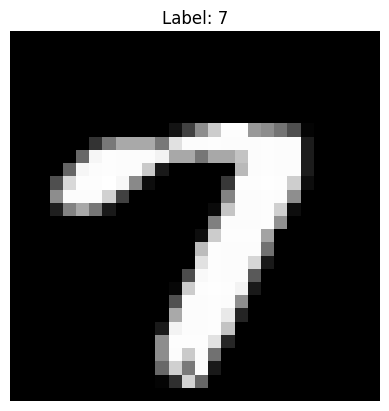

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# train_images에서 랜덤하게 이미지를 선택해서 matplotlib.pyplot으로 시각화
index = np.random.randint(0, train_images.shape[0])
plt.imshow(train_images[index], cmap='gray')
plt.title(f"Label: {train_labels[index]}")
plt.axis('off')
plt.show()

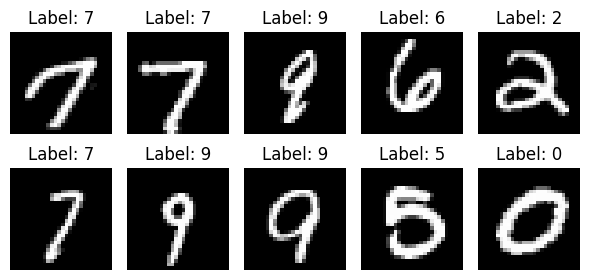

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 랜덤하게 한번에 10장의 이미지를 출력하기. 2행 5열로 이미지 출력하기

fig, axes = plt.subplots(2, 5, figsize=(6, 3))
axes = axes.flatten() # 2x5 배열을 1차원 배열로 평탄화

for i in range(10):
    index = np.random.randint(0, train_images.shape[0])
    axes[i].imshow(train_images[index], cmap='gray')
    axes[i].set_title(f"Label: {train_labels[index]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

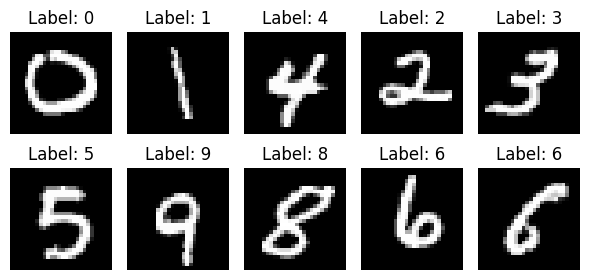

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 랜덤하게 한번에 10장의 test_images 이미지를 출력하기. 2행 5열로 이미지 출력하기

fig, axes = plt.subplots(2, 5, figsize=(6, 3))
axes = axes.flatten() # 2x5 배열을 1차원 배열로 평탄화

for i in range(10):
    index = np.random.randint(0, test_images.shape[0])
    axes[i].imshow(test_images[index], cmap='gray')
    axes[i].set_title(f"Label: {test_labels[index]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### 3. 데이터 전처리(valid 데이터 분할까지 포함)

#### 3.1 정규화(Normalize) 0 ~ 255(int) -> 0 ~ 1(float)
#### 3.2 레이블을 10진수 -> one-hot encoding
#### 3.3 reshape (60000,28,28) -> (60000,784)

In [ ]:
# train_images, test_images를 0~1사이의 실수값으로 변경
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
print(train_labels[0:5])
print(test_labels[0:5])

[5 0 4 1 9]
[7 2 1 0 4]


In [ ]:
# train_labels, test_labels 를 one-hot encoding으로 변환
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
print(train_labels[0:5])
print(test_labels[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
# train_images, test_images를 reshape (60000,28,28) -> (60000,784)
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [ ]:
# train_images, train_labels에서 데이터를 분할
# train:valid=8:2 (48000:12000)
from sklearn.model_selection import train_test_split

train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [ ]:
train_images.shape, train_labels.shape, valid_images.shape, valid_labels.shape

((48000, 784), (48000, 10), (12000, 784), (12000, 10))

### 4. 신경망 모델링

In [ ]:
from keras import models
from keras.layers import Dense, Flatten, Input

# keras로 mnist 데이터셋 모델링하기

# 신경망을 쌓아 올리는 방식
model = models.Sequential()

# 입력층(Input)을 정의
model.add(Input(shape=(28*28,)))

# 은닉층(Hidden)을 정의
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))

# 출력층(Output)을 정의
# activation을 softmax로 사용
# 다중 분류 모델의 출력값이 Logit(숫자)이 나오는데
# Logit을 확률로 변환해주는 함수 softmax
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,346 (2.10 MB)

 Trainable params: 550,346 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

### 5. 모델 설정(compile)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

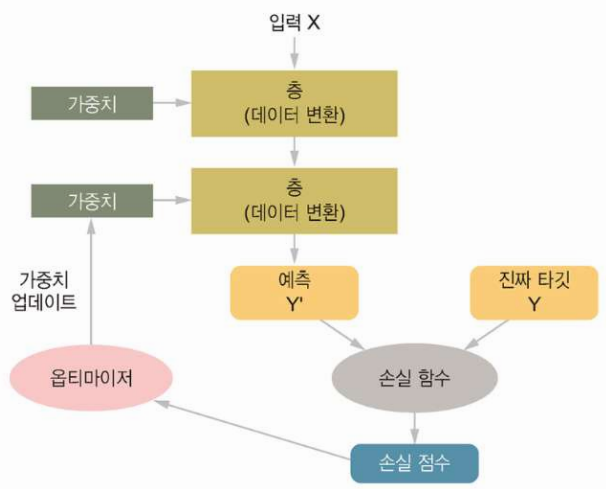

In [ ]:
# 하이퍼-파라메터
EPOCHS = 100
BATCH_SIZE = 256
PATIENCE=20

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ModelCheckpoint함수를 적용해서 val_loss를 기준으로 가장 좋은 성능의 모델을 mnist_best파일명으로 저장
MC_CB = ModelCheckpoint(filepath='mnist_best.keras', monitor='val_accuracy', save_best_only=True)

# ReduceLROnPlateu함수를 적용해서 val_loss를 기준으로 patience=10으로 설정하고 factor=0.5로 설정
RLROP_CB = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=0.00001)

# EarlyStopping callback함수를 적용해서 patience=20, 모니터 기준은 val_loss로 설정
ES_CB = EarlyStopping(monitor='val_accuracy', patience=PATIENCE)

### 6. 모델 학습(fit)

In [ ]:
# callback함수를 사용하려면 callbacks인수에 리스트로 등록
history = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[ES_CB, MC_CB, RLROP_CB])

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8351 - loss: 0.6053 - val_accuracy: 0.9501 - val_loss: 0.1634 - learning_rate: 0.0010
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9644 - loss: 0.1182 - val_accuracy: 0.9682 - val_loss: 0.1043 - learning_rate: 0.0010
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9768 - loss: 0.0747 - val_accuracy: 0.9738 - val_loss: 0.0833 - learning_rate: 0.0010
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9861 - loss: 0.0470 - val_accuracy: 0.9725 - val_loss: 0.0875 - learning_rate: 0.0010
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9886 - loss: 0.0373 - val_accuracy: 0.9793 - val_loss: 0.0730 - learning_rate: 0.0010
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9929 - loss: 0.0249 - val_accuracy: 0.9783 - val_loss: 0.0778 - learning_rate: 0.0010
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9951 - loss: 0

In [ ]:
# learning_rate 조정 이전 val_loss의 최저값 : 0.07626650482416153
history.history

{'accuracy': [0.9114999771118164,
  0.9657708406448364,
  0.9777916669845581,
  0.9853333234786987,
  0.988979160785675,
  0.9927083253860474,
  0.9944583177566528,
  0.9940624833106995,
  0.9949166774749756,
  0.9965624809265137,
  0.9953749775886536,
  0.9966250061988831,
  0.9981250166893005,
  0.995479166507721,
  0.9981874823570251,
  0.9983541369438171,
  0.9975833296775818,
  0.9962916374206543,
  0.9963958263397217,
  0.9975416660308838,
  0.999625027179718,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.318349689245224,
  0.11386317759752274,
  0.07412135601043701,
  0.04834773764014244,
  0.036290138959884644,
  0.024669019505381584,
  0.018027884885668755,
  0.017739851027727127

### 7. Loss, Accuracy 그래프로 확인

In [ ]:
#loss, accuracy 그리고 val_loss, val_accuracy에 대한 그래프를 생성

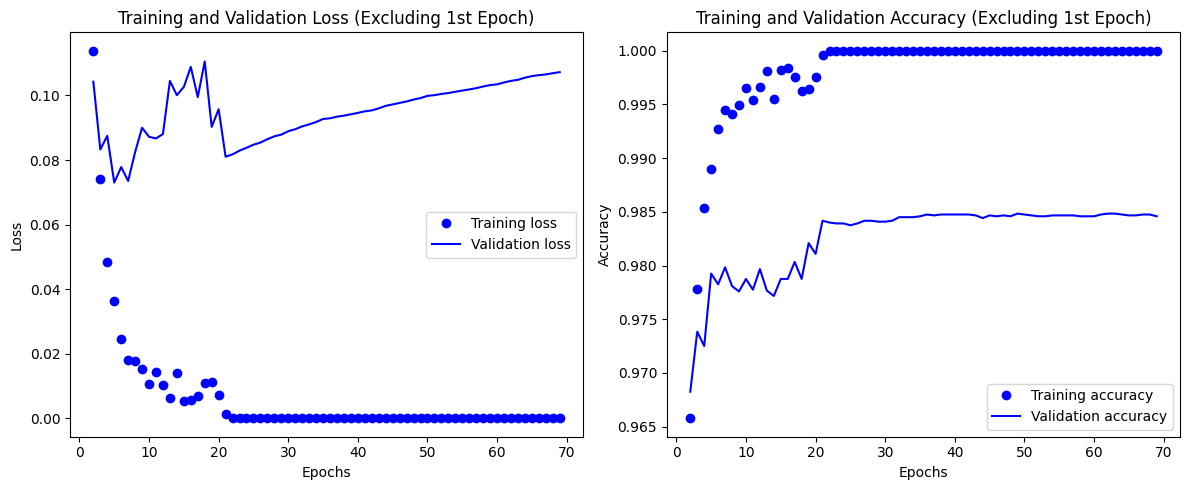

In [ ]:
import matplotlib.pyplot as plt

# Loss와 Accuracy 그래프
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

# 첫 번째 Epoch 제외 (인덱스 0 제외)
epochs = range(2, len(loss_values) + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values[1:], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values[1:], 'b', label='Validation loss')
plt.title('Training and Validation Loss (Excluding 1st Epoch)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values[1:], 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values[1:], 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy (Excluding 1st Epoch)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### 8. 모델 평가(evaluate)

In [ ]:
from keras.models import load_model

# mnist_best.keras 파일으로 로딩해서 모델 평가를 진행
best_model = load_model('mnist_best.keras')

test_loss_best, test_acc_best = best_model.evaluate(test_images, test_labels)
print(f'Best Model Test Loss: {test_loss_best:.4f}')
print(f'Best Model Test Accuracy: {test_acc_best:.4f}')